# MACHINE LEARNING
## Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### Loading and Overviewing Dataset

In [2]:
a = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
data = pd.read_csv(a)

data.head(5)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Check for missing values
data.isnull().sum()


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:

# Display summary statistics
data.describe()


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Detailed Data Visualisation
## Pair Plot


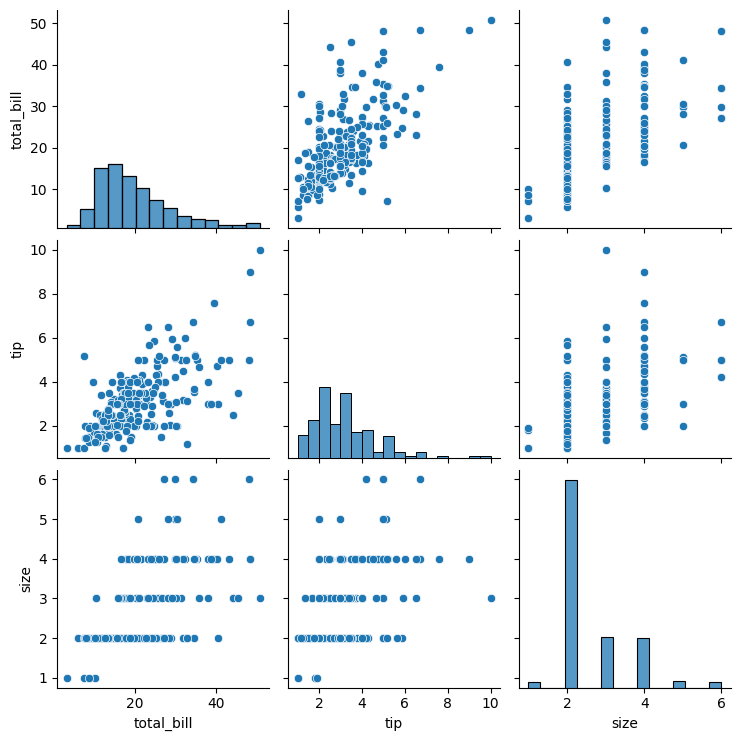

In [6]:
# Pairplot to visualize relationships between all pairs of variables
sns.pairplot(data)
plt.show()


## Heatmap

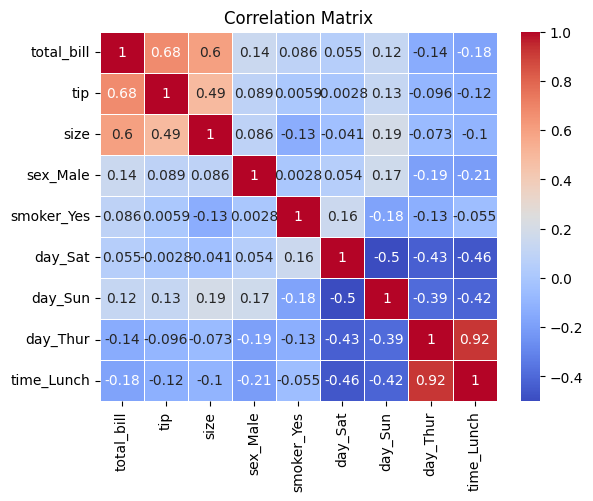

In [11]:
# Convert categorical variables into dummy/indicator variables
data_numeric = pd.get_dummies(data, drop_first=True)

# Now calculate the correlation matrix
corr = data_numeric.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Histogram

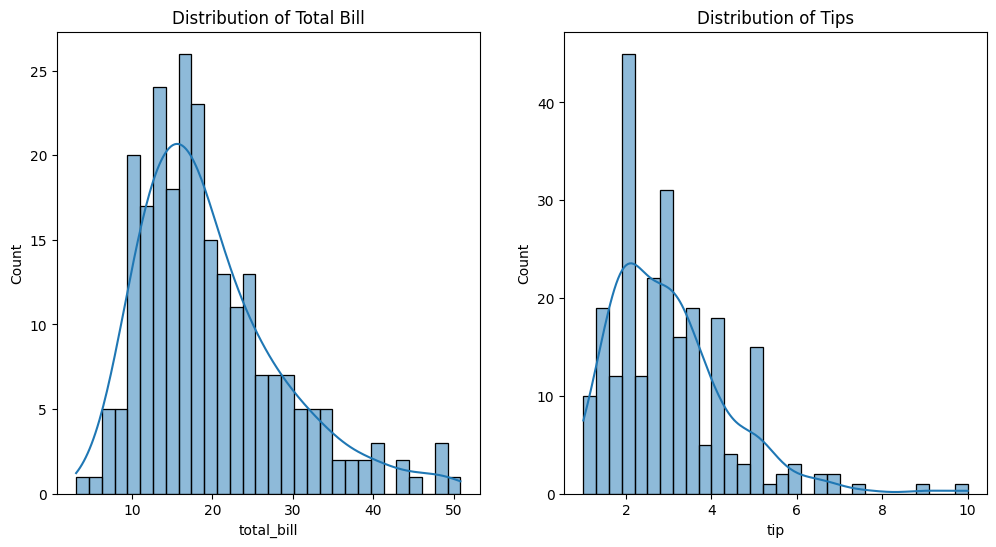

In [8]:
# Histograms for the distribution of total bill and tip
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['total_bill'], kde=True, bins=30)
plt.title('Distribution of Total Bill')

plt.subplot(1, 2, 2)
sns.histplot(data['tip'], kde=True, bins=30)
plt.title('Distribution of Tips')

plt.show()


## Box Plot

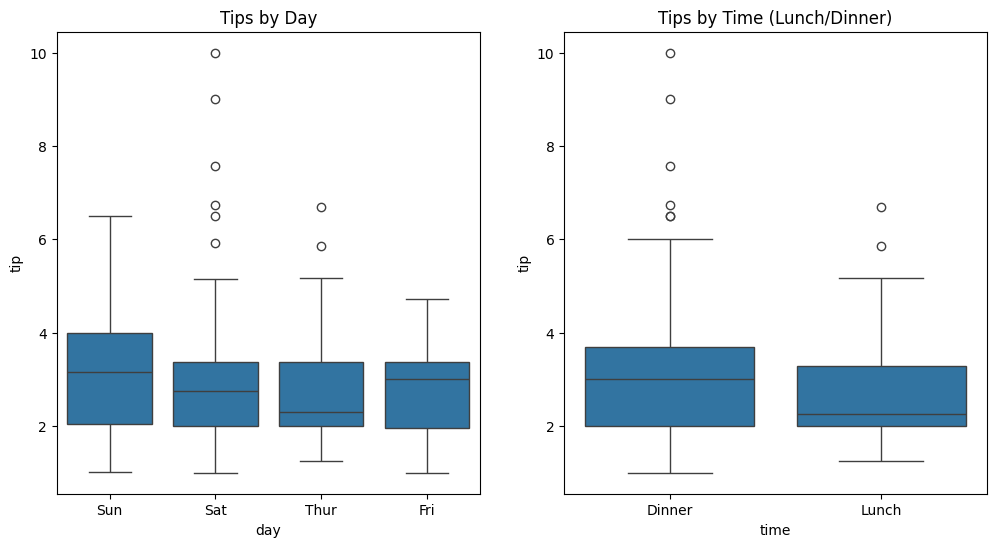

In [9]:
# Boxplot for tips across different days
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='day', y='tip', data=data)
plt.title('Tips by Day')

plt.subplot(1, 2, 2)
sns.boxplot(x='time', y='tip', data=data)
plt.title('Tips by Time (Lunch/Dinner)')

plt.show()


## Joint Plot

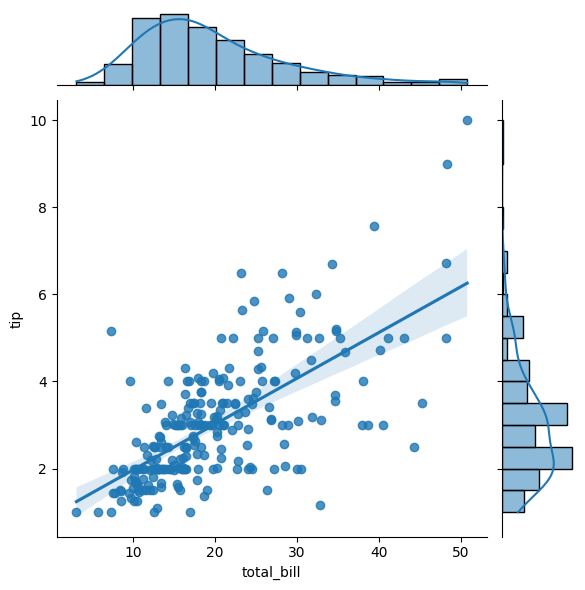

In [10]:
# Jointplot to visualize the relationship between total bill and tip with regression line
sns.jointplot(x='total_bill', y='tip', data=data, kind='reg')
plt.show()


## Data Preprocessing

In [12]:
# Select features and target variable
X = data[['total_bill']]
y = data['tip']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Building

In [13]:
# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

## Model Evaluation

In [14]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.5688142529229538
R-squared: 0.5449381659234663


## Plot the result

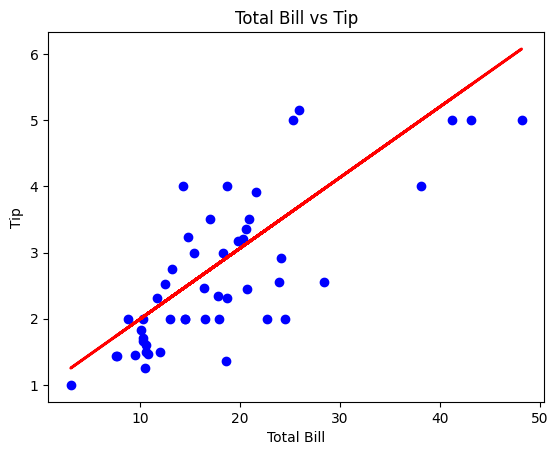

In [15]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')
plt.show()


## Interpret the Result

In [16]:
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_}')


Intercept: 0.9252355585570546
Coefficient: [0.10696371]


## Residual Analysis

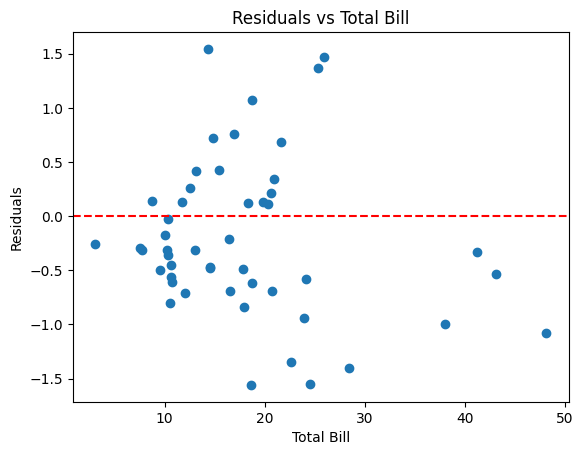

In [17]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(X_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Total Bill')
plt.ylabel('Residuals')
plt.title('Residuals vs Total Bill')
plt.show()


## Check Assumptions of Linear Regression
### Linearity and Homoscedasticity

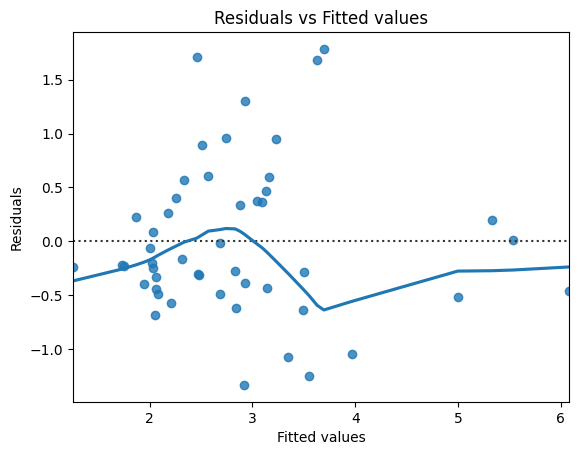

In [18]:
# Plot residuals vs fitted values
sns.residplot(x=y_pred, y=residuals, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()


### Normality of Residuals

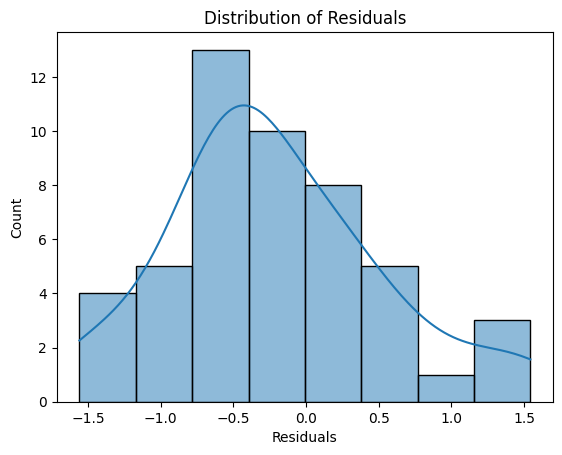

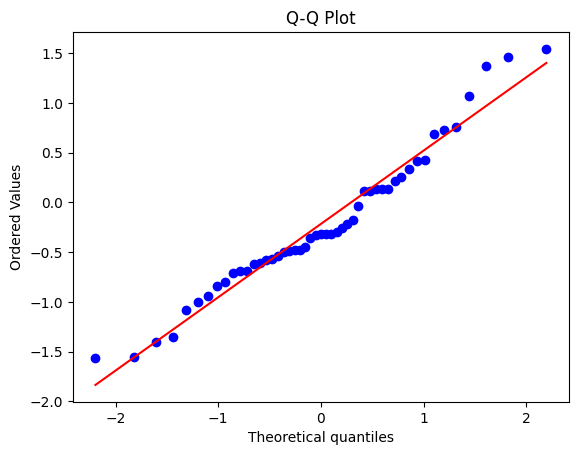

In [19]:
# Plot the distribution of residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# Q-Q plot for normality
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


## Experiment with Transformation

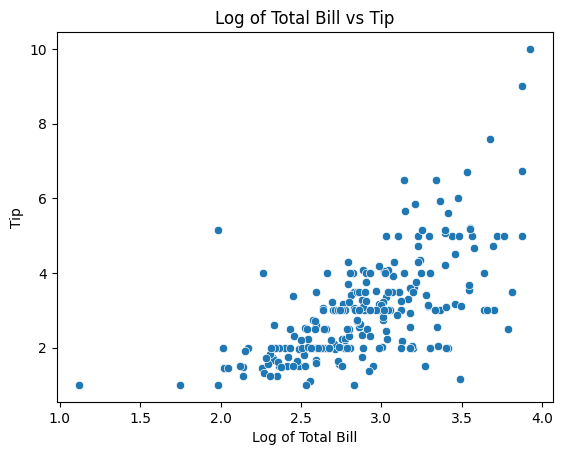

Mean Squared Error (Log Transformation): 0.6073286138948184
R-squared (Log Transformation): 0.5141259708139385


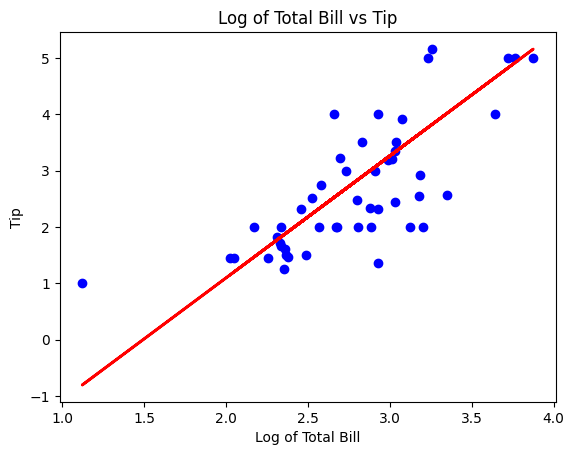

In [22]:
import numpy as np
# Log transformation of the independent variable
data['log_total_bill'] = np.log(data['total_bill'])

# Scatter plot to visualize relationship after transformation
sns.scatterplot(x='log_total_bill', y='tip', data=data)
plt.xlabel('Log of Total Bill')
plt.ylabel('Tip')
plt.title('Log of Total Bill vs Tip')
plt.show()

# Repeat the regression analysis with the transformed variable
X_log = data[['log_total_bill']]
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size=0.2, random_state=42)

# Initialize the model
model_log = LinearRegression()

# Train the model on the training data
model_log.fit(X_train_log, y_train_log)

# Make predictions on the test data
y_pred_log = model_log.predict(X_test_log)

# Calculate Mean Squared Error (MSE) and R-squared
mse_log = mean_squared_error(y_test_log, y_pred_log)
r2_log = r2_score(y_test_log, y_pred_log)

print(f'Mean Squared Error (Log Transformation): {mse_log}')
print(f'R-squared (Log Transformation): {r2_log}')

# Plot the regression line for the transformed variable
plt.scatter(X_test_log, y_test_log, color='blue')
plt.plot(X_test_log, y_pred_log, color='red', linewidth=2)
plt.xlabel('Log of Total Bill')
plt.ylabel('Tip')
plt.title('Log of Total Bill vs Tip')
plt.show()


## Feature Engineering

In [21]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Select multiple features and target variable
X_multiple = data_encoded.drop('tip', axis=1)
y_multiple = data_encoded['tip']

# Split the dataset into training and testing sets
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

# Initialize the model
model_multiple = LinearRegression()

# Train the model on the training data
model_multiple.fit(X_train_multiple, y_train_multiple)

# Make predictions on the test data
y_pred_multiple = model_multiple.predict(X_test_multiple)

# Calculate Mean Squared Error (MSE) and R-squared
mse_multiple = mean_squared_error(y_test_multiple, y_pred_multiple)
r2_multiple = r2_score(y_test_multiple, y_pred_multiple)

print(f'Mean Squared Error (Multiple Features): {mse_multiple}')
print(f'R-squared (Multiple Features): {r2_multiple}')


Mean Squared Error (Multiple Features): 0.7033566017436105
R-squared (Multiple Features): 0.43730181943482505
